# Análise Exploratória dos dados do Enem 2019
<hr/>

**Objetivo:**

O objetivo desse projeto é entender qual a influência de algumas variáveis socioeconômicas nas notas dos inscritos e responder perguntas como:  

- Quantidade de inscritos por Estado, Gênero, Cor/Raça, Tipo de Escola?
- Distribuição das Notas?
- Qual Estado tem a maior media de notas?
- Quantos menores tem inscritos na prova?
- Resultados por gênero?
- O tipo de escola que se formou tem influência na nota?
- A renda familiar realmente influência? 
- Ter acesso fácil a internet ajuda? 

E por fim verificar a correlação entre as notas das Provas.

**Dados:**

- A base de dados utilizada nesse notebook está disponível no site do [Inep](http://inep.gov.br/microdados), junto com toda a documentação.
- Nessa análise eu não utilizei todas as variáveis disponível, devido ao tamanho da base. Logo mais explicarei as variáveis escolhidas.

<hr/>

**Autor:** Rafael A. L. Alves

**Linkedin:** [Rafael A. L. Alves](https://www.linkedin.com/in/rafael-a-l-alves/)


## Bibliotecas

**Bibliotecas Utilizadas.**


*   **Pandas** - É uma biblioteca usada análise e manipulação de dados. Em particular, oferece estruturas e operações para manipular DataFrame, tabelas numéricas e séries temporais
* **Numpy** - é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.
*   **Matplotlib** - É uma biblioteca de software para criação de gráficos e visualizações de dados em geral.
*   **Seaborn** - É uma biblioteca de visualização de dados Python baseada em matplotlib . Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.



In [2]:
#IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#CONFIGURAÇÕES DOS GRÁGICOS
plt.rcParams['figure.figsize'] = (20.0, 08.0)
plt.rcParams['font.family'] = "serif"
sns.color_palette("Blues", as_cmap=True)
sns.set(style="white")

In [4]:
#DRIVE
from google.colab import drive
drive.mount ('/content/drive')
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Alura/Enem_2019_DATA.csv', encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dados

In [5]:
dados.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025
0,PA,21,M,3,1,0,472.9,466.0,497.3,369.1,780.0,B,A
1,PA,16,F,3,1,1,358.9,495.4,482.3,416.5,600.0,B,A
2,PA,18,F,1,3,0,574.2,538.7,582.6,571.5,640.0,C,B
3,PA,23,M,3,2,0,NaN,NaN,NaN,NaN,NaN,C,A
4,PA,23,M,3,1,0,NaN,NaN,NaN,NaN,NaN,C,A


In [6]:
dados.columns.values

array(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006', 'Q025'],
      dtype=object)

**DADOS**

Significado das variáveis utilizadas no projeto.
<hr>

**SG_UF_RESIDENCIA** - Sigla da Unidade da Federação de residência

**NU_IDADE** - Idade

**TP_SEXO** - Sexo

* M = Masculino
* F = Feminino

**TP_COR_RACA** - Cor/Raça

* 0 = Não declarado
* 1 = Branca
* 2 = Preta
* 3 = Parda
* 4 = Amarela
* 5 = Indígena 

**TP_ESCOLA** - Tipo de escola do Ensino Médio

* 1 = Não Respondeu
* 2 = Pública
* 3 = Privada
* 4 = Exterior

**IN_TREINEIRO** - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

*   1 = Sim
*   0 = Não

**NU_NOTA_CN** - Nota da prova de Ciências da Natureza

**NU_NOTA_CH** - Nota da prova de Ciências Humanas

**NU_NOTA_LC** - Nota da prova de Linguagens e Códigos

**NU_NOTA_MT** - Nota da prova de Matemática

**NU_NOTA_REDACAO** - Nota da prova de Redação

**Q006** - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)


* A = Nenhuma renda.
* B = Até 998,00.
* C = De 998,01 até 1.497,00.
* D = De 1.497,01 até 1.996,00.
* E = De 1.996,01 até 2.495,00.
* F = De 2.495,01 até 2.994,00.
* G = De 2.994,01 até 3.992,00.
* H = De 3.992,01 até 4.990,00.
* I = De 4.990,01 até 5.988,00.
* J = De 5.988,01 até 6.986,00.
* K = De 6.986,01 até 7.984,00.
* L = De 7.984,01 até 8.982,00.
* M = De 8.982,01 até 9.980,00.
* N = De 9.980,01 até 11.976,00.
* O = De 11.976,01 até 14.970,00.
* P = De 14.970,01 até 19.960,00.
* Q = Mais de R$ 19.960,00.




**Q025** - Na sua residência tem acesso à Internet?


*   A = Não
*   B = Sim
<hr>


In [7]:
# SHAPE DO DATAFRAME
print('Meu dataset tem',dados.shape[0],'linhas e',dados.shape[1],'colunas')

Meu dataset tem 5095270 linhas e 13 colunas


In [8]:
# INFORMAÇÕES DO DATAFRAME (TAMANHO, TIPO DE DADO)
pd.DataFrame({'tipos':dados.dtypes, 'missing':dados.isna().sum()})

,tipos,missing
SG_UF_RESIDENCIA,object,0
NU_IDADE,int64,0
TP_SEXO,object,0
TP_COR_RACA,int64,0
TP_ESCOLA,int64,0
IN_TREINEIRO,int64,0
NU_NOTA_CN,float64,1384837
NU_NOTA_CH,float64,1172125
NU_NOTA_LC,float64,1172125
NU_NOTA_MT,float64,1384837


## Análise Individual por Variável

Nesta sessão eu fiz uma análise individual dos dados de cada variável antes de fazer a análise exploratoria relacionando elas.

### SG_UF_RESIDENCIA

In [9]:
#ESTADOS DOS INSCRITOS
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [10]:
#QUANTIDADE DE ESTADOS
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [11]:
#QUANTIDADE DE INSCRITOS POR ESTADO
dados["SG_UF_RESIDENCIA"].value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0.5, 1.0, 'QUANTIDADE DE INSCRITOS POR ESTADO - ENEM 2019')

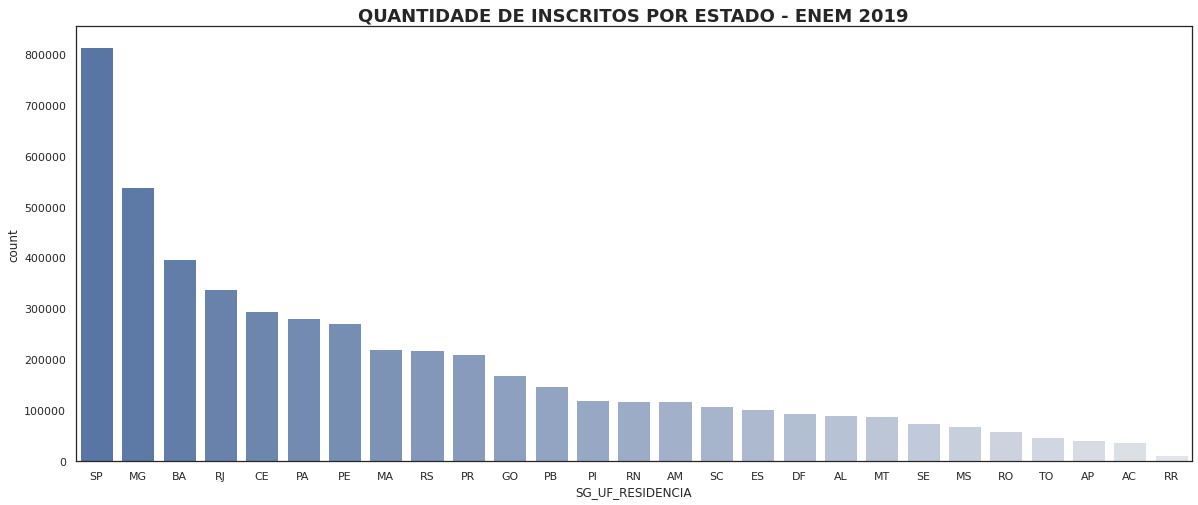

In [12]:
#GRAFÍCO DE QUANTIDADE DE INSCRITOS POR ESTADO
palette_platform = sns.light_palette("b",30,reverse=True)
sns.countplot(data=dados, x='SG_UF_RESIDENCIA', order = dados['SG_UF_RESIDENCIA'].value_counts().index,palette=palette_platform)
plt.title("QUANTIDADE DE INSCRITOS POR ESTADO - ENEM 2019", weight='bold', size=18)

**Conclusão**

Olhando para os dados da variável "SG_UF_RESIDENCIA", fica bem claro que o numero de inscritos segue a tendência de que o Estado com a maior população tem o maior numero de inscritos.

### NU_IDADE

In [13]:
#QUANTIDADE DE INSCRITOS POR IDADE ORDENADO PELO INDEX
dados['NU_IDADE'].value_counts().sort_values()

94         1
92         1
88         1
87         1
4          2
       ...  
16    316437
20    409385
19    577161
17    847303
18    864186
Name: NU_IDADE, Length: 91, dtype: int64

Text(0.5, 1.0, 'QUANTIDADE DE INSCRITOS POR IDADE - ENEM 2019')

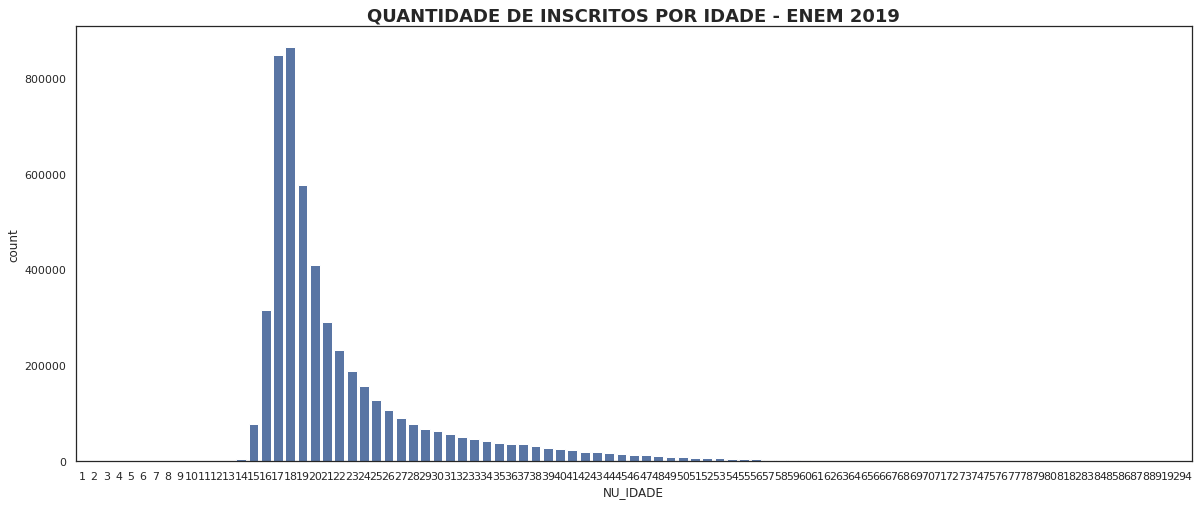

In [14]:
#GRÁFICO DE QUANTIDADE DE INSCRITOS
sns.countplot(data=dados, x='NU_IDADE', color='b')
plt.title("QUANTIDADE DE INSCRITOS POR IDADE - ENEM 2019", weight='bold', size=18)

Text(0.5, 1.0, 'HISTOGRAMA DA DISTRIBUIÇÃO DE IDADE - ENEM 2019')

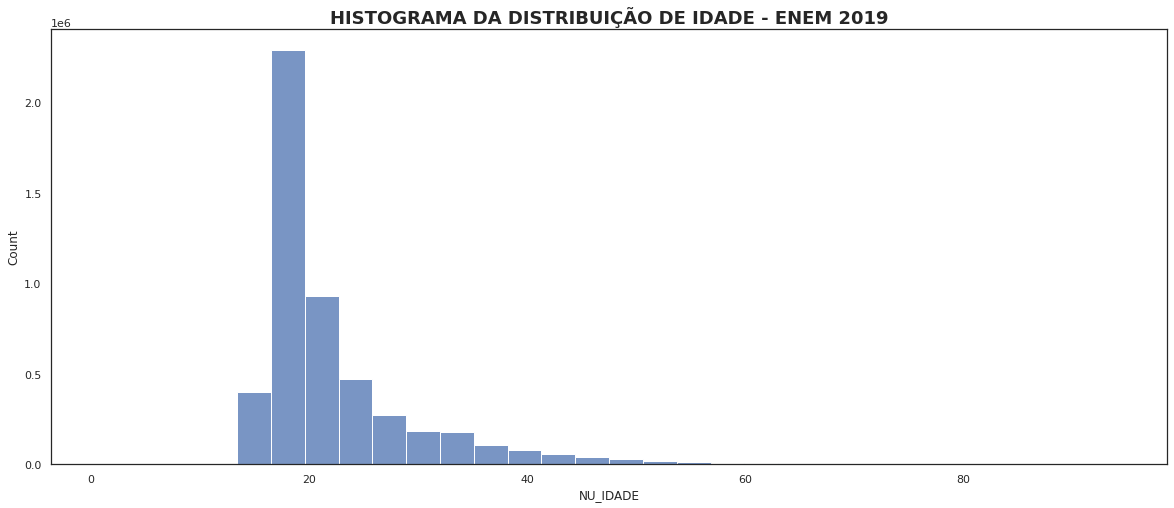

In [15]:
#HISTOGRAMA DA DISTRIBUIÇÃO DE IDADE
plt.figure(figsize=(20,8))
sns.histplot(dados, x ="NU_IDADE",bins=30)
plt.title("HISTOGRAMA DA DISTRIBUIÇÃO DE IDADE - ENEM 2019", weight='bold', size=18)

In [16]:
# QUANTIDADE DE PESSOAS COM IDADE INFERIOR A 10.
len(dados.query("NU_IDADE <= 10").value_counts())

65

**Conclusão**

Na variável "NU_IDADE", conseguimos ver a que a maioria dos inscritos está entre 17 e 18 anos de idade, onde no caso seria os incristos com idade de vestibuar e o pessoal que acabou de se formar no colegial.

Apesar de não ter uma idade minima para realizar a prova do Enem, conseguimos notar que existem alguns registros com a idade inferior a 10 anos, o que provavelmente deva ser alguns outliers. 

### TP_SEXO


In [17]:
#QUANTIDADE DE INSCRITOS POR GÊNERO
dados['TP_SEXO'].value_counts()

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

Text(0.5, 1.0, '% HOMENS E MULHERES - ENEM 2019')

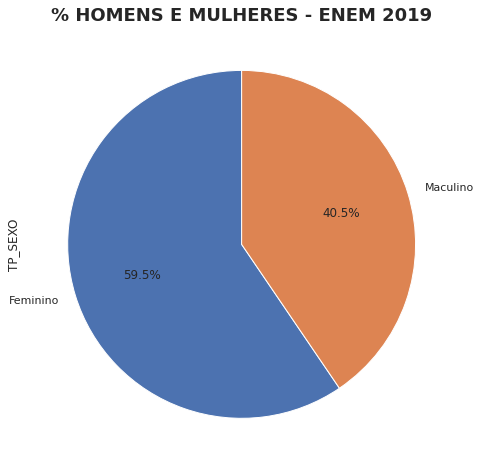

In [18]:
#GRÁFICO % POR GÊNERO
dados["TP_SEXO"].value_counts().plot.pie(figsize=(20,8), 
                                         labels=["Feminino", "Maculino"],
                                         autopct='%1.1f%%',
                                         startangle=90).set_title("% HOMENS E MULHERES - ENEM 2019", weight='bold', size=18)

**Conclusão**

A maioria dos candidatos inscritos no Enem, 59,5% são de mulheres. 

### TP_COR_RACA


In [19]:
#QUANTIDADE DE INSCRITOS POR COR/RAÇA
dados['TP_COR_RACA'].value_counts()

3    2364063
1    1831779
2     648309
4     116162
0     103201
5      31756
Name: TP_COR_RACA, dtype: int64

Text(0.5, 1.0, 'QUANTIDADE DE INSCRITOS POR COR/RAÇA - ENEM 2019')

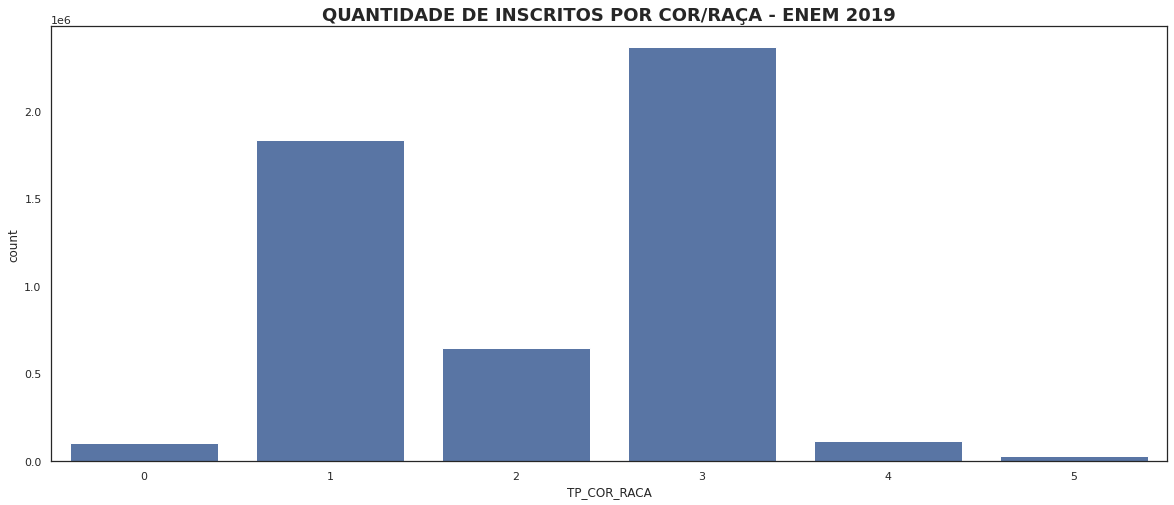

In [20]:
#GRÁFICO DE QUANTIDADE DE INSCRITOS POR COR/RAÇA
sns.countplot(data=dados, x=dados['TP_COR_RACA'].sort_index(),color='b')
plt.title("QUANTIDADE DE INSCRITOS POR COR/RAÇA - ENEM 2019", weight='bold', size=18)

**Conclusão**

Olhando para os dados da variável "TP_COR_RACA", fica bem claro que os dados seguem a tendência da maioria da populaçao brasileira que é formada por pessoas pardas.


### TP_ESCOLA


In [21]:
#QUANTIDADE DE INSCRITOS POR TIPO DE ESCOLA
dados['TP_ESCOLA'].value_counts()

1    3629376
2    1247262
3     218632
Name: TP_ESCOLA, dtype: int64

Tipos de escolas:
1-desconhecida
2-publica
3-privada


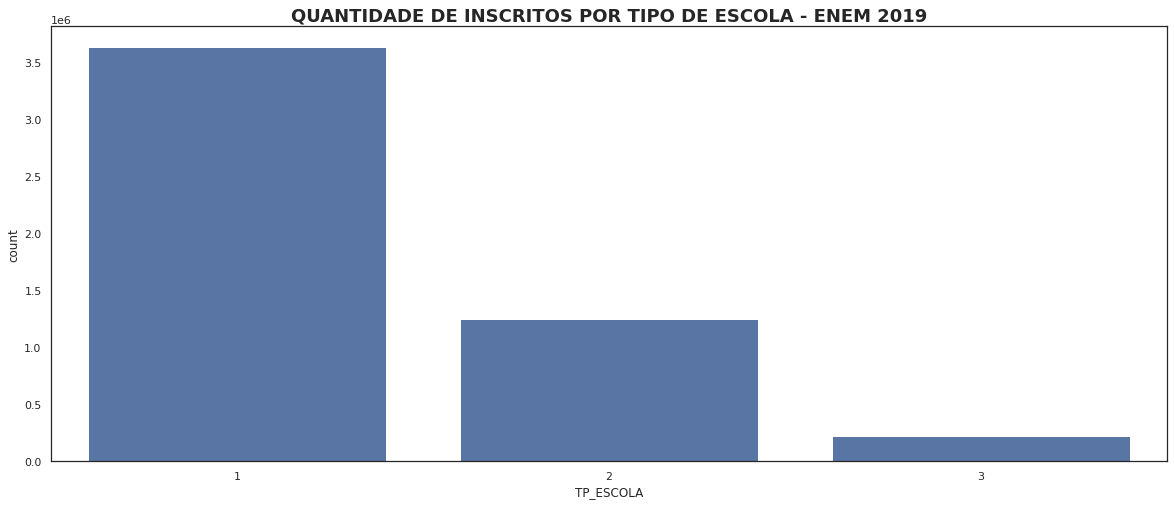

In [22]:
#GRÁFICO DE QUANTIDADE DE INSCRITOS POR TIPO DE ESCOLA
sns.countplot(data=dados, x='TP_ESCOLA', color='b')
plt.title("QUANTIDADE DE INSCRITOS POR TIPO DE ESCOLA - ENEM 2019", weight='bold', size=18)
print('''Tipos de escolas:
1-desconhecida
2-publica
3-privada''')

### IN_TREINEIRO

In [23]:
#QUANTIDADE DE TREINEIROS
dados['IN_TREINEIRO'].value_counts()

0    4478602
1     616668
Name: IN_TREINEIRO, dtype: int64

Text(0.5, 1.0, '% ENTRE TREINEIROS E NÃO TREINEIROS - ENEM 2019')

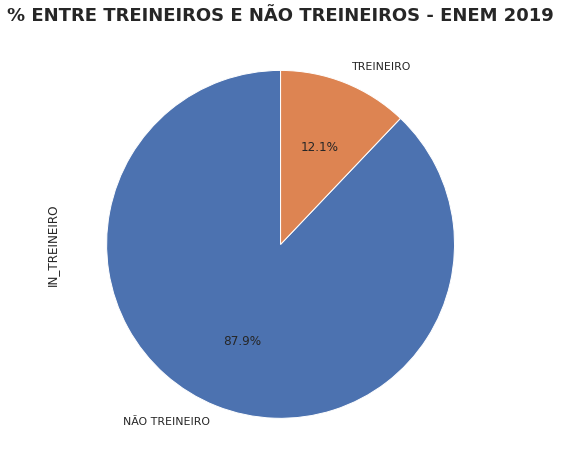

In [24]:
#GRÁFICO % DE TREINEIROS
dados["IN_TREINEIRO"].value_counts().plot.pie(figsize=(20,8), 
                                         labels=["NÃO TREINEIRO", "TREINEIRO"],
                                         autopct='%1.1f%%',
                                         startangle=90).set_title("% ENTRE TREINEIROS E NÃO TREINEIROS - ENEM 2019", weight='bold', size=18)

In [25]:
#TREINEIROS POR IDADE
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

1     1
2     3
4     1
5     1
6     7
     ..
68    2
69    2
70    1
72    1
73    1
Name: NU_IDADE, Length: 70, dtype: int64

**Conclusão**

Avaliando a quantidade de treineiros, fica bem claro que uma pequena parte dos dos inscritos faz a prova com a finalidade de treinar.

**Ajuste das notas 0**

Esse ajuste foi necessário pois na base de dados existem vários registros que zeraram na soma de todas as provas, e isso gera alguns problemas para as análises, como por exemplo na visualização dos gráficos. Sendo assim efetuei a remoção desses registros.

In [26]:
#VARIÁVEL COM O NOME DAS PROVAS
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

In [27]:
#CRIANDO UMA NOVA COLUNA NO DATAFRAME COM A SOMA DAS NOTAS
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados["NU_NOTA_TOTAL"]

0          2585.3
1          2353.1
2          2907.0
3             0.0
4             0.0
            ...  
5095265       0.0
5095266       0.0
5095267       0.0
5095268    2529.2
5095269    2148.5
Name: NU_NOTA_TOTAL, Length: 5095270, dtype: float64

In [28]:
#REMOVENDO OS REGISTROS QUE A SOMA DA NOTA É IGUAL A 0
provas.append("NU_NOTA_TOTAL")
dados = dados.query("NU_NOTA_TOTAL != 0")
dados.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
0,PA,21,M,3,1,0,472.9,466.0,497.3,369.1,780.0,B,A,2585.3
1,PA,16,F,3,1,1,358.9,495.4,482.3,416.5,600.0,B,A,2353.1
2,PA,18,F,1,3,0,574.2,538.7,582.6,571.5,640.0,C,B,2907.0
5,PA,31,M,1,1,0,522.0,592.6,582.0,605.3,580.0,C,A,2881.9
6,PA,30,F,3,1,0,407.4,480.1,464.3,581.5,360.0,C,B,2293.3


In [29]:
dados.shape

(3930054, 14)

### NU_NOTA_CN

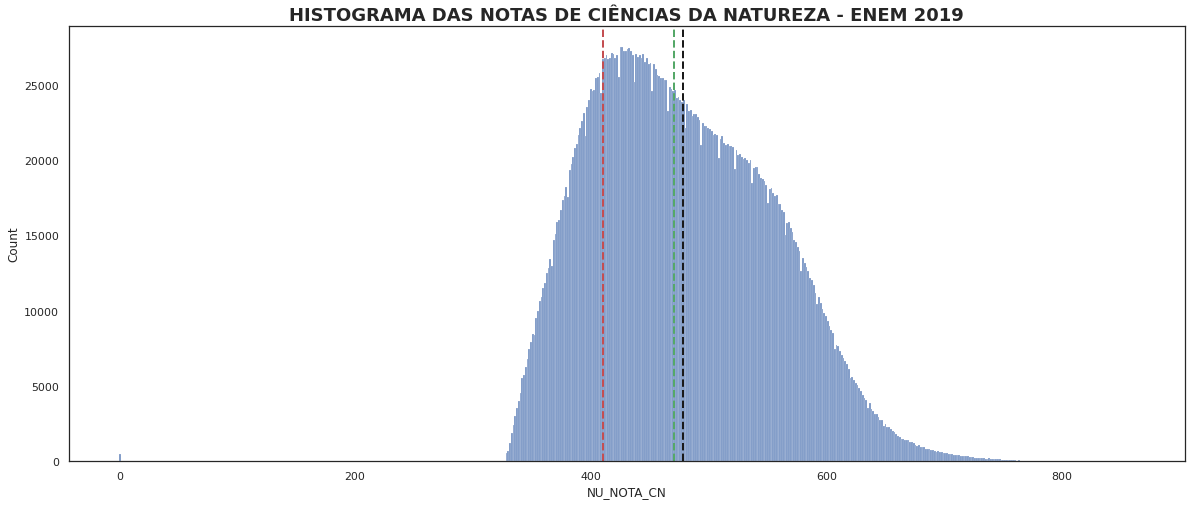

In [30]:
#HISTOGRAMA DA NOTA DE CIÊNCIAS DA NATUREZA
sns.histplot(dados, x ="NU_NOTA_CN")
plt.title("HISTOGRAMA DAS NOTAS DE CIÊNCIAS DA NATUREZA - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_CN'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_CN'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_CN'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS DE CIÊNCIAS DA NATUREZA')

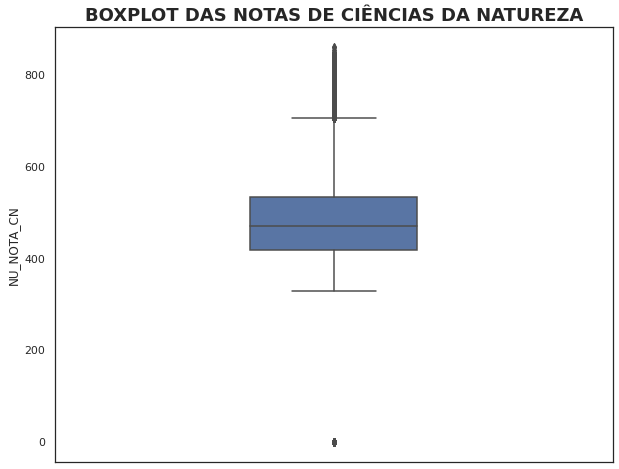

In [31]:
#BOXPLOT DAS NOTAS DE CIÊNCIAS DA NATUREZA
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_CN", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS DE CIÊNCIAS DA NATUREZA", weight='bold', size=18)

### NU_NOTA_CH

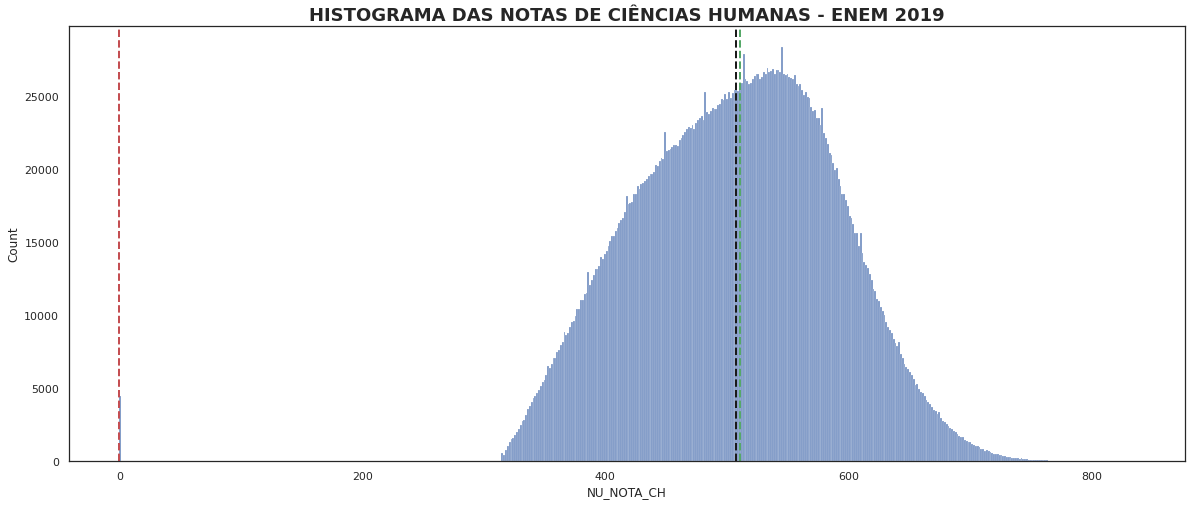

In [32]:
#HISTOGRAMA DA NOTA DE CIÊNCIAS HUMANAS
sns.histplot(dados, x ="NU_NOTA_CH")
plt.title("HISTOGRAMA DAS NOTAS DE CIÊNCIAS HUMANAS - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_CH'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_CH'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_CH'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS DE CIÊNCIAS HUMANAS')

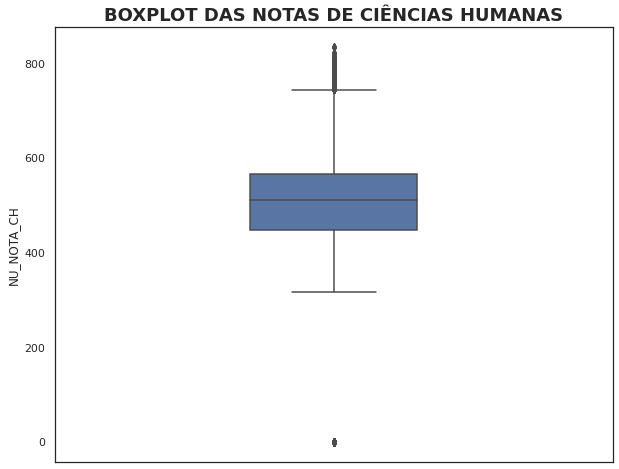

In [33]:
#BOXPLOT DAS NOTAS DE CIÊNCIAS HUMANAS
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_CH", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS DE CIÊNCIAS HUMANAS", weight='bold', size=18)

### NU_NOTA_LC

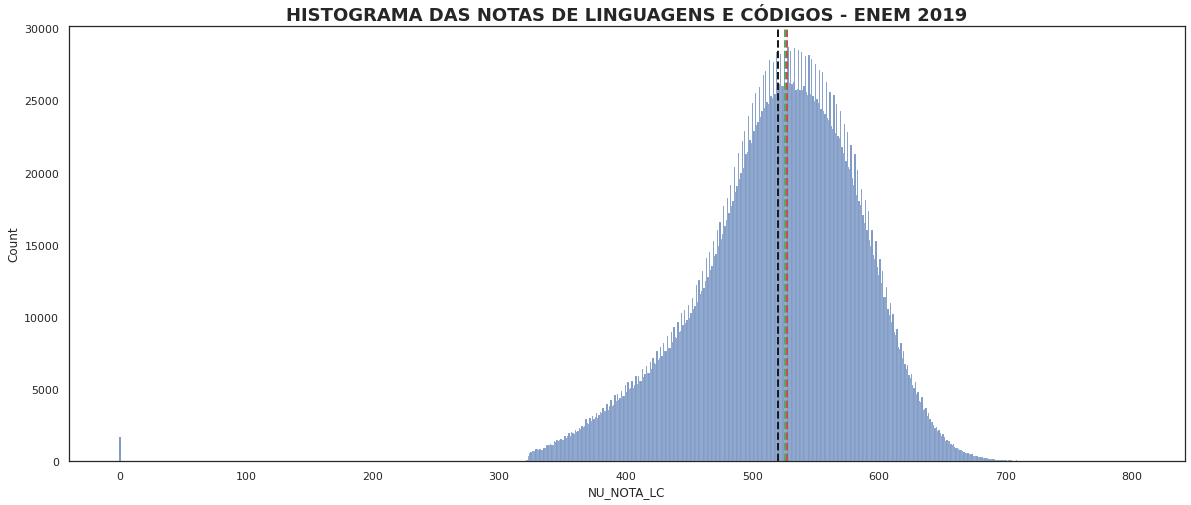

In [34]:
#HISTOGRAMA DA NOTA DE LINGUAGENS E CODIGOS
sns.histplot(dados, x ="NU_NOTA_LC")
plt.title("HISTOGRAMA DAS NOTAS DE LINGUAGENS E CÓDIGOS - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_LC'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_LC'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_LC'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS DE LINGUAGENS E CÓDIGOS')

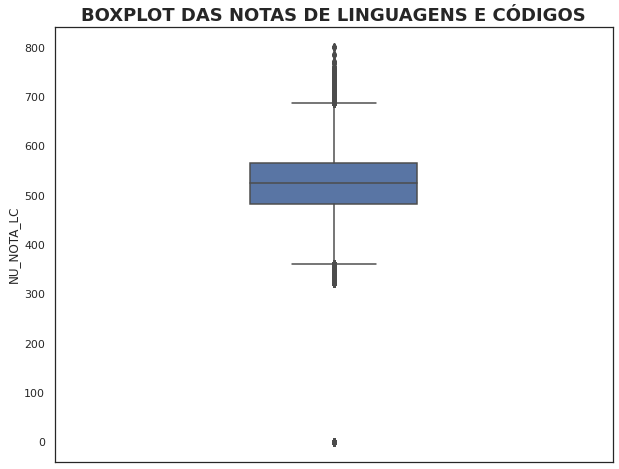

In [35]:
#BOXPLOT DAS NOTAS DE LINGUAGENS E CÓDIGOS
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_LC", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS DE LINGUAGENS E CÓDIGOS", weight='bold', size=18)

### NU_NOTA_MT

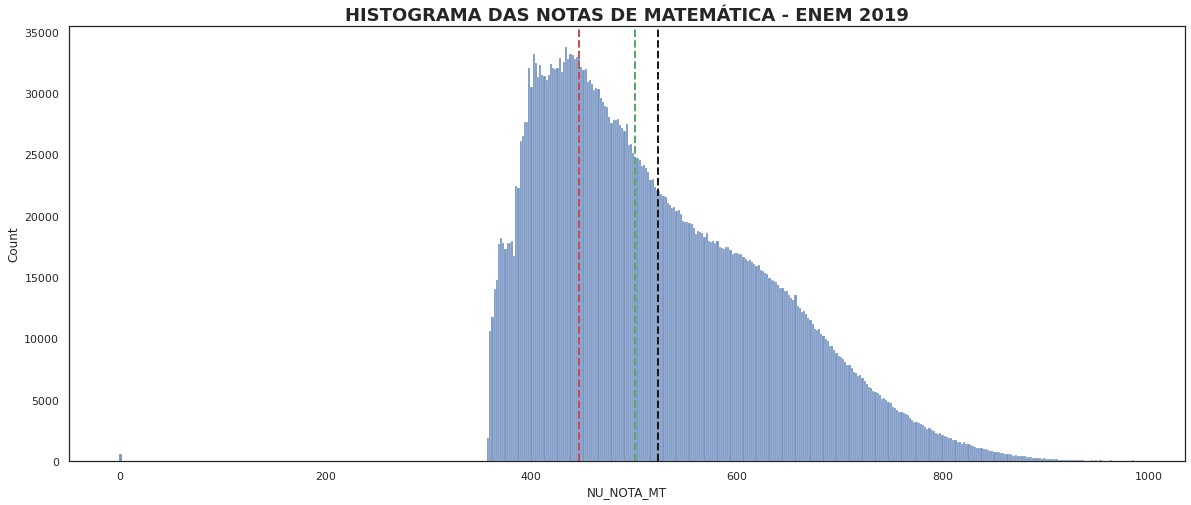

In [36]:
#HISTOGRAMA DA NOTA DE MATEMÁTICA
sns.histplot(dados, x ="NU_NOTA_MT")
plt.title("HISTOGRAMA DAS NOTAS DE MATEMÁTICA - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_MT'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_MT'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_MT'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS DE MATEMÁTICA')

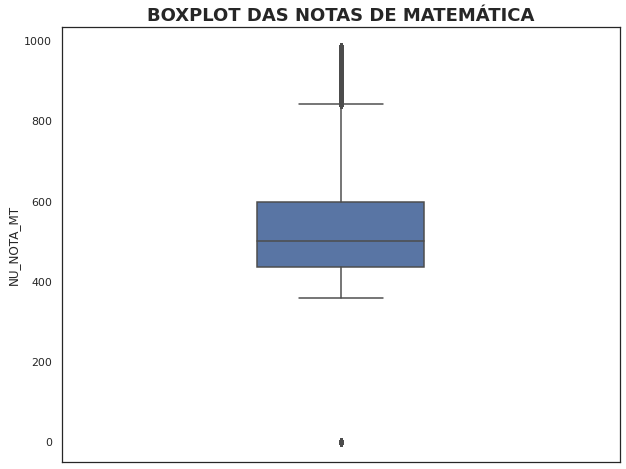

In [37]:
#BOXPLOT DAS NOTAS DE MATEMÁTICA
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_MT", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS DE MATEMÁTICA", weight='bold', size=18)

### NU_NOTA_REDACAO   

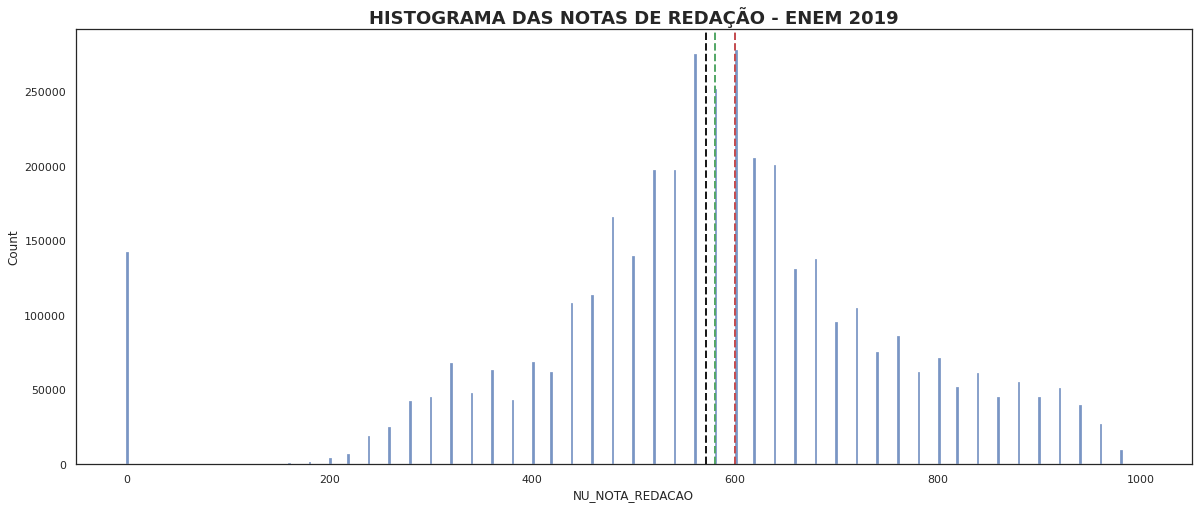

In [38]:
#HISTOGRAMA DA NOTA DE REDAÇÃO
sns.histplot(dados, x ="NU_NOTA_REDACAO")
plt.title("HISTOGRAMA DAS NOTAS DE REDAÇÃO - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_REDACAO'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_REDACAO'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_REDACAO'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS DE REDAÇÃO')

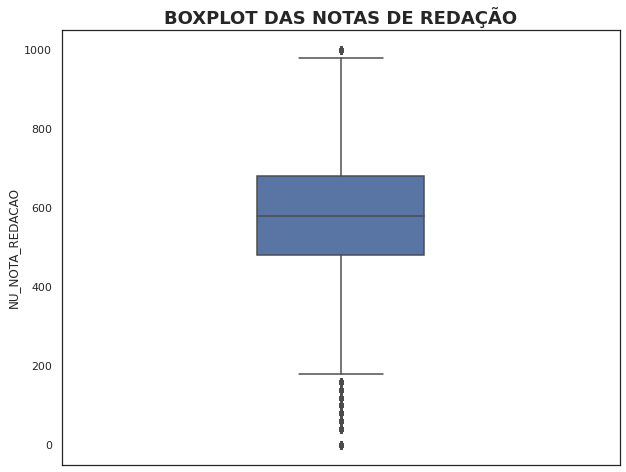

In [39]:
#BOXPLOT DAS NOTAS DE REDAÇÃO
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_REDACAO", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS DE REDAÇÃO", weight='bold', size=18)

### NU_NOTA_TOTAL

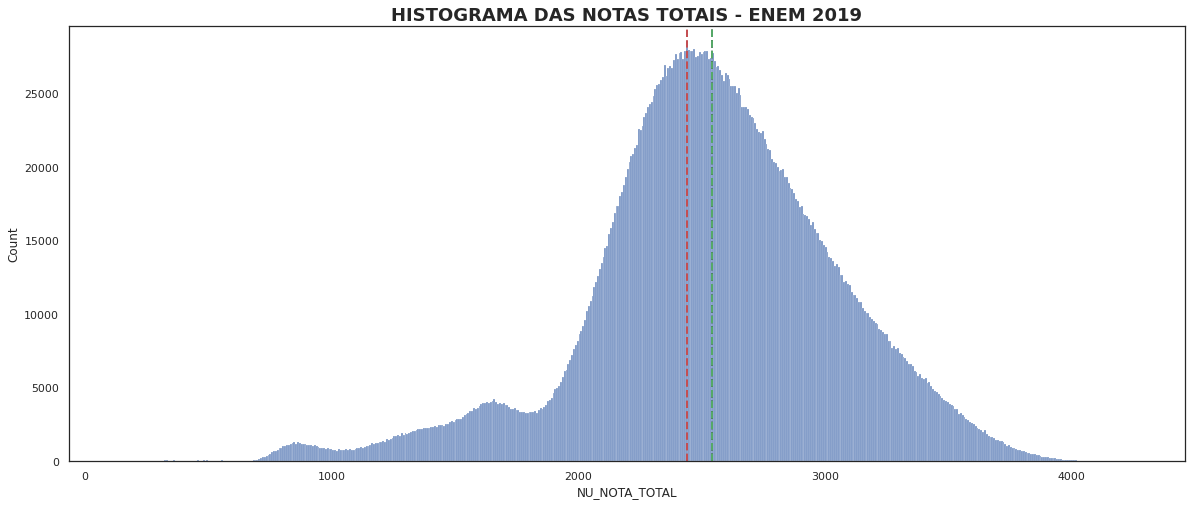

In [40]:
#HISTOGRAMA DA NOTA TOTAL
sns.histplot(dados, x ="NU_NOTA_TOTAL")
plt.title("HISTOGRAMA DAS NOTAS TOTAIS - ENEM 2019", weight='bold', size=18)
plt.axvline(dados['NU_NOTA_TOTAL'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_TOTAL'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(dados['NU_NOTA_TOTAL'].mode()[0], color='r', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'BOXPLOT DAS NOTAS TOTAIS')

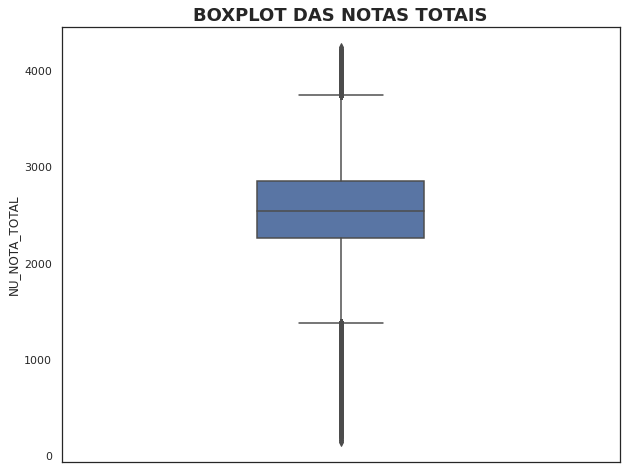

In [41]:
#BOXPLOT DAS NOTAS TOTAIS
plt.figure(figsize=(10, 8))
sns.boxplot(y = "NU_NOTA_TOTAL", data = dados, width=0.3)
plt.title("BOXPLOT DAS NOTAS TOTAIS", weight='bold', size=18)

**Conclusão**

Após realizar a análise em todos os histogramas das notas individuais e do total de todas as notas, o unico que se aproxima de uma distribuição normal é o da prova de Linguagens e Códigos.


### Q006              

Renda da Familia do Candidato.

In [42]:
#QUANTIDADE DE INSCRITOS POR CLASSIFICAÇÃO DE RENDA
dados['Q006'].value_counts().sort_index()

A    169802
B    955525
C    968963
D    379339
E    366306
F    181295
G    245468
H    161410
I    122679
J     69399
K     50304
L     38185
M     37476
N     53700
O     43603
P     37543
Q     49057
Name: Q006, dtype: int64

Text(0.5, 1.0, 'QUANTIDADE DE INSCRITOS POR CLASSIFICAÇÃO DE RENDA - ENEM 2019')

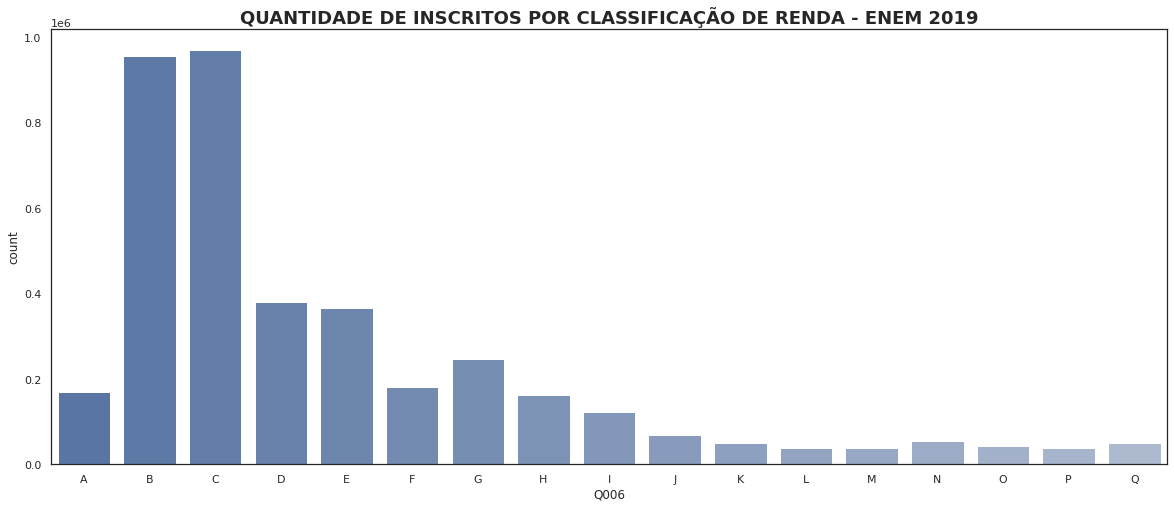

In [43]:
#GRAFÍCO DE QUANTIDADE DE INSCRITOS POR CLASSIFICAÇÃO DE RENDA
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada
sns.countplot(data=dados, x=dados['Q006'],palette=palette_platform, order=renda_ordenada)
plt.title("QUANTIDADE DE INSCRITOS POR CLASSIFICAÇÃO DE RENDA - ENEM 2019", weight='bold', size=18)

**Conclusão**

A maior parte dos inscritos está na faixa de A a D ou seja de nenhuma renda até R$ 2.495,00 reais no mês para a familia toda.

### Q025              

Inscritos com e sem Internet

Text(0.5, 1.0, '% ENTRE INSCRITOS COM ACESSO INTERNET E SEM INTERNET - ENEM 2019')

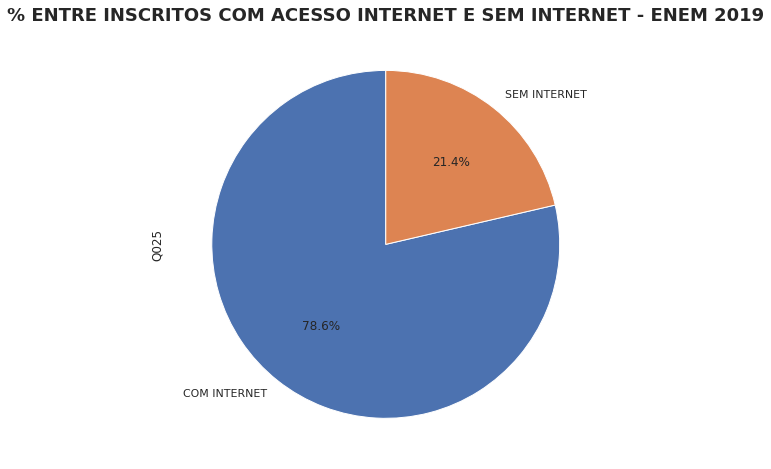

In [44]:
#GRÁFICO % DE INSCRITOS COM ACESSO A INTERNET
dados["Q025"].value_counts().plot.pie(figsize=(20,8), 
                                         labels=["COM INTERNET", "SEM INTERNET"],
                                         autopct='%1.1f%%',
                                         startangle=90).set_title("% ENTRE INSCRITOS COM ACESSO INTERNET E SEM INTERNET - ENEM 2019", weight='bold', size=18)

## Análise Exploratória 

Nesta sessão de análise exploratória vou realizar o confronto entre as variáves para responder as perguntas de análises socioeconômicas do inicio do Notebook.

### Funções para fazer o plot dos Gráficos

In [45]:
#FUNÇÃO PARA PLOTAR O BOXPLOT
def plotBoxplot(x,y,data,order,hue,title):
  plt.figure(figsize=(20,8))
  sns.boxplot(x=x, y=y, data=data, order=order, hue=hue)
  plt.title(title,weight='bold', size=18 )

In [46]:
#FUNÇÃO PARA PLOTAR O BARPLOT
def plotBarplot(x,y,data,order,hue,title):
  plt.figure(figsize=(20,8))
  sns.barplot(x=x, y=y, data=data, order=order, hue=hue)
  plt.title(title)

### Qual estado tem a maior média de notas?


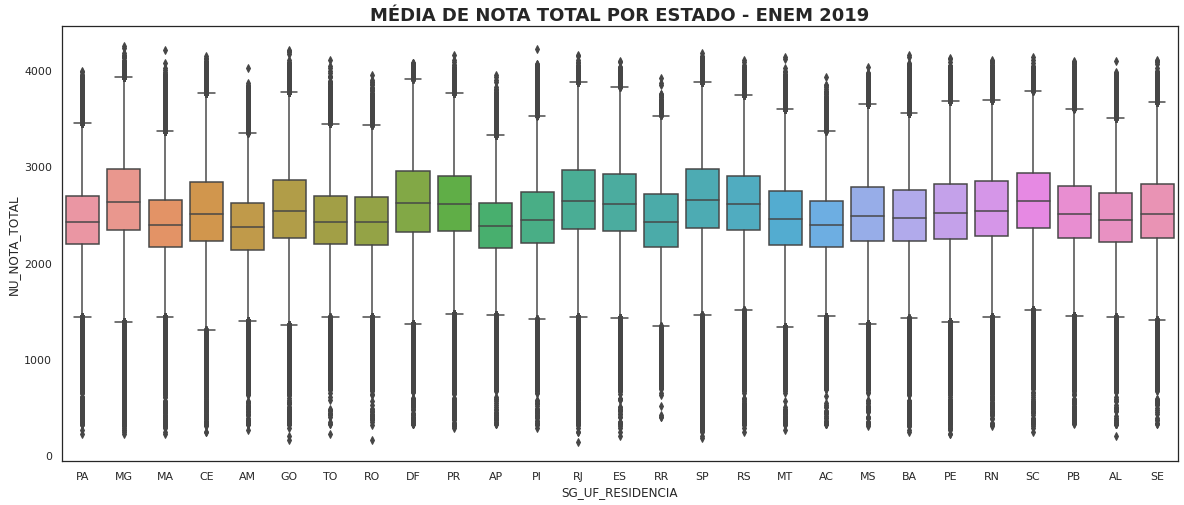

In [47]:
#BOXPLOT COM A MÉDIA POR ESTADO
plotBoxplot(x="SG_UF_RESIDENCIA",y="NU_NOTA_TOTAL",data = dados, order=None, hue=None, title="MÉDIA DE NOTA TOTAL POR ESTADO - ENEM 2019")

### Quantos menores tem inscritos na prova?

In [48]:
#QUANTIDADE DE MENORES DE 16 ANOS
len(dados.query('NU_IDADE <=16'))

374834

In [49]:
# ESTADO DOS INSCRITOS MENORES DE INDADE
inscrito_menor = dados.query("NU_IDADE <= 16")["SG_UF_RESIDENCIA"].value_counts()
inscrito_menor

SP    67164
MG    39730
BA    26323
CE    25239
PE    24752
PR    19066
RJ    18698
GO    18469
PA    18458
MA    16794
PB    12553
PI    10598
RS    10593
SC     8942
MT     7300
SE     6786
MS     5946
RN     5525
ES     5395
AL     5357
DF     4853
TO     4422
AM     4107
RO     3014
AP     2173
AC     1741
RR      836
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0.5, 1.0, 'QUANTIDADE DE INSCRITOS MENOR DE IDADE POR ESTADO - ENEM 2019')

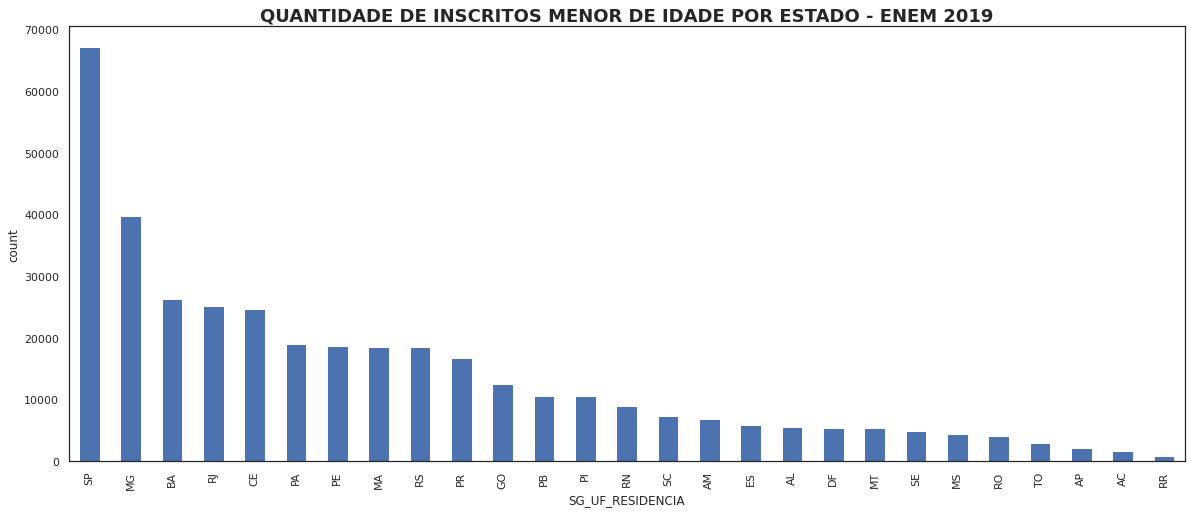

In [50]:
#GRÁFICO DE MENOR DE IDADE POR ESTADO
inscrito_menor.plot.bar()
sns.countplot(data=dados, x=dados.query("NU_IDADE <= 16")["SG_UF_RESIDENCIA"].value_counts(), order = dados['SG_UF_RESIDENCIA'].value_counts().index,palette=palette_platform)
plt.title("QUANTIDADE DE INSCRITOS MENOR DE IDADE POR ESTADO - ENEM 2019", weight='bold', size=18)

In [51]:
# INSCRITO MENOR DE IDADE POR GÊNERO
inscrito_menor_genero = dados.query("NU_IDADE <= 16")["TP_SEXO"].value_counts()
inscrito_menor_genero

F    240250
M    134584
Name: TP_SEXO, dtype: int64

Text(0.5, 1.0, '% MENOR DE IDADE POR GÊNERO - ENEM 2019')

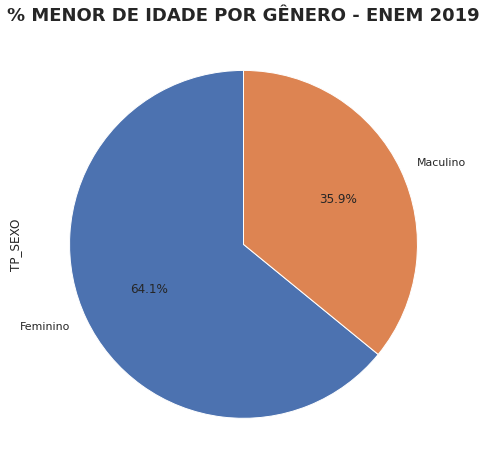

In [52]:
#GRÁFICO % MENOR DE IDADE POR GÊNERO
dados.query("NU_IDADE <= 16")["TP_SEXO"].value_counts().plot.pie(figsize=(20,8),
                                                                 labels=["Feminino", "Maculino"],
                                                                 autopct='%1.1f%%',
                                                                 startangle=90).set_title("% MENOR DE IDADE POR GÊNERO - ENEM 2019", weight='bold', size=18)

### Resultados por gêneros?


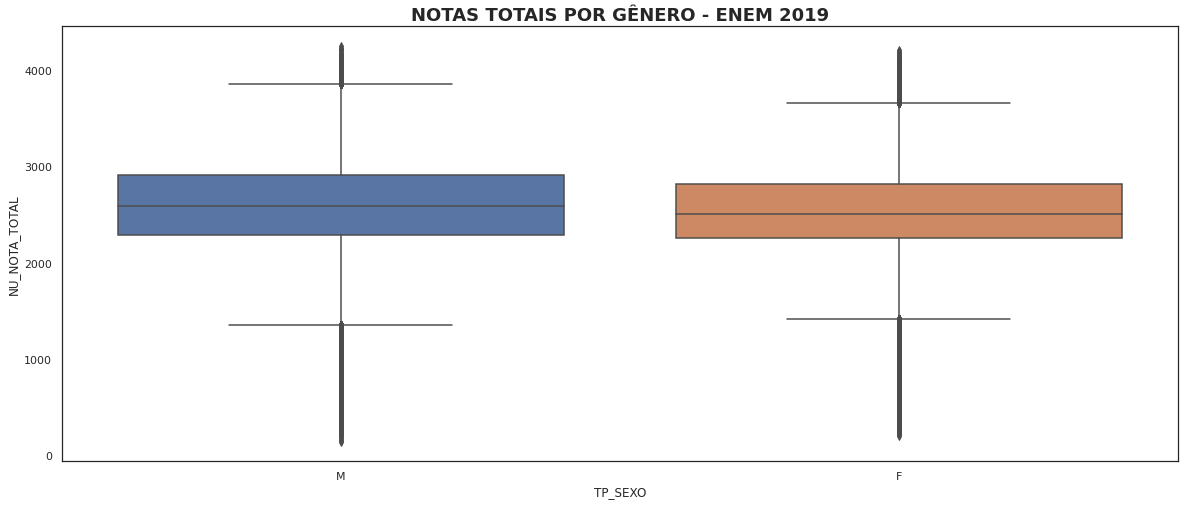

In [53]:
#NOTAS TOTAIS POR GÊNERO
plotBoxplot(x="TP_SEXO",y="NU_NOTA_TOTAL",data = dados, order=None, hue=None, title="NOTAS TOTAIS POR GÊNERO - ENEM 2019")

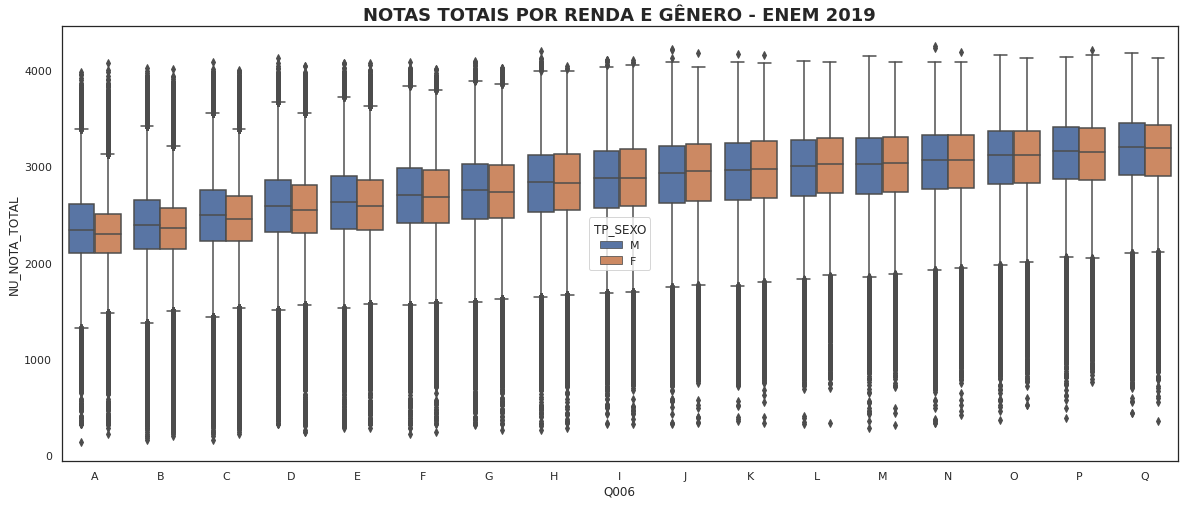

In [54]:
#NOTAS TOTAIS POR RENDA E GÊNERO
plotBoxplot(x="Q006",y="NU_NOTA_TOTAL",data= dados, order=renda_ordenada, hue="TP_SEXO", title="NOTAS TOTAIS POR RENDA E GÊNERO - ENEM 2019")

### O tipo de escola em que se formou influência na nota?

Tipos de Escolas:
1-Desconhecida
2-Publica
3-Privada


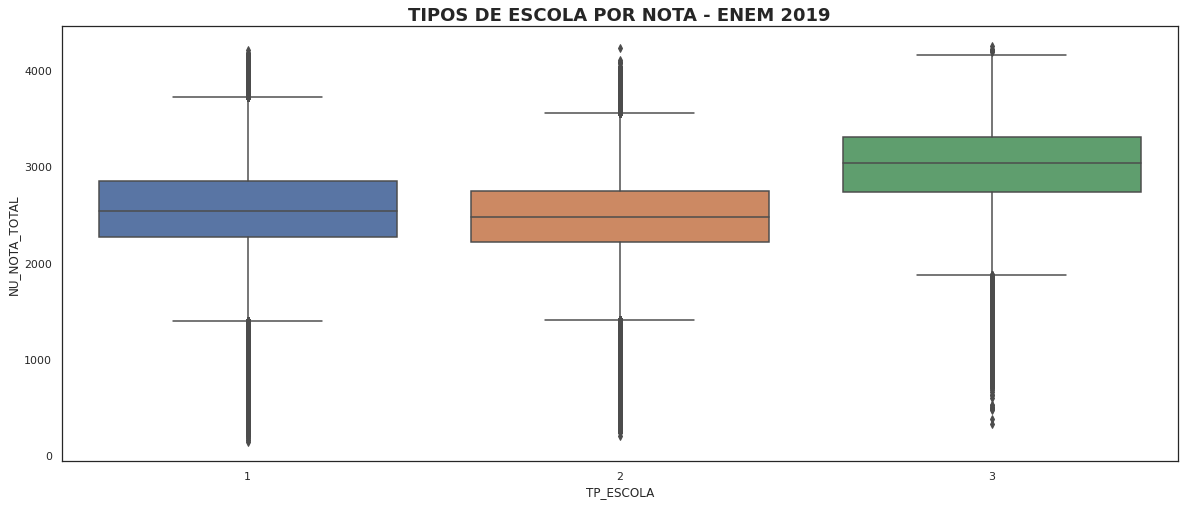

In [55]:
#NOTAS TOTAIS POR CLASSIFICAÇÃO DE RENDA FAMILIAR
plotBoxplot(x="TP_ESCOLA",y="NU_NOTA_TOTAL",data = dados, order=None, hue=None, title="TIPOS DE ESCOLA POR NOTA - ENEM 2019")
print('''Tipos de Escolas:
1-Desconhecida
2-Publica
3-Privada''')

### A Renda Familiar realmente influência na nota?

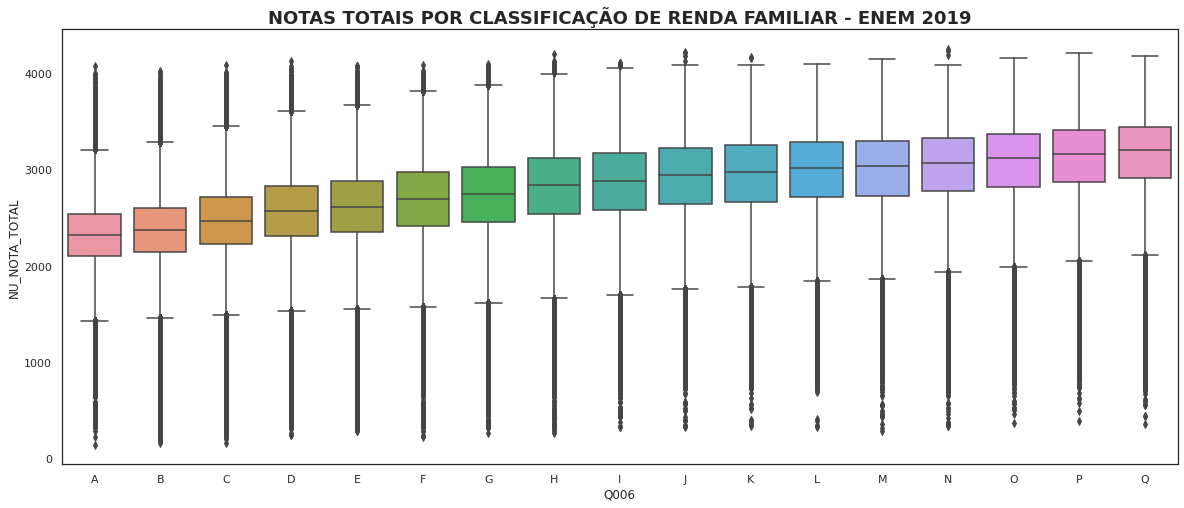

In [56]:
#NOTAS TOTAIS POR CLASSIFICAÇÃO DE RENDA FAMILIAR
plotBoxplot(x="Q006",y="NU_NOTA_TOTAL",data = dados, order=renda_ordenada, hue=None, title="NOTAS TOTAIS POR CLASSIFICAÇÃO DE RENDA FAMILIAR - ENEM 2019")

### Ter acesso fácil a internet realmente ajuda?

ACESSO A INTERNET:
A - SEM ACESSO
B - COM ACESSO


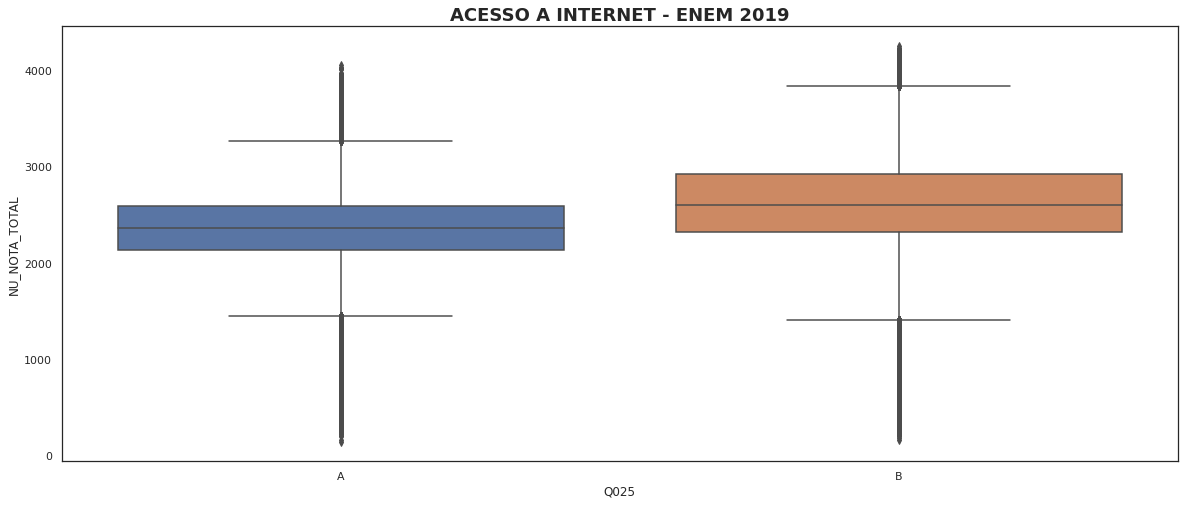

In [57]:
#ACESSO A INTERNET
plotBoxplot(x="Q025",y="NU_NOTA_TOTAL",data = dados, order=None, hue=None, title="ACESSO A INTERNET - ENEM 2019")
print('''ACESSO A INTERNET:
A - SEM ACESSO
B - COM ACESSO''')

Text(0.5, 1.0, 'HISTOGRAMA DE INSCRISTOS COM E SEM INTERNET - ENEM 2019')

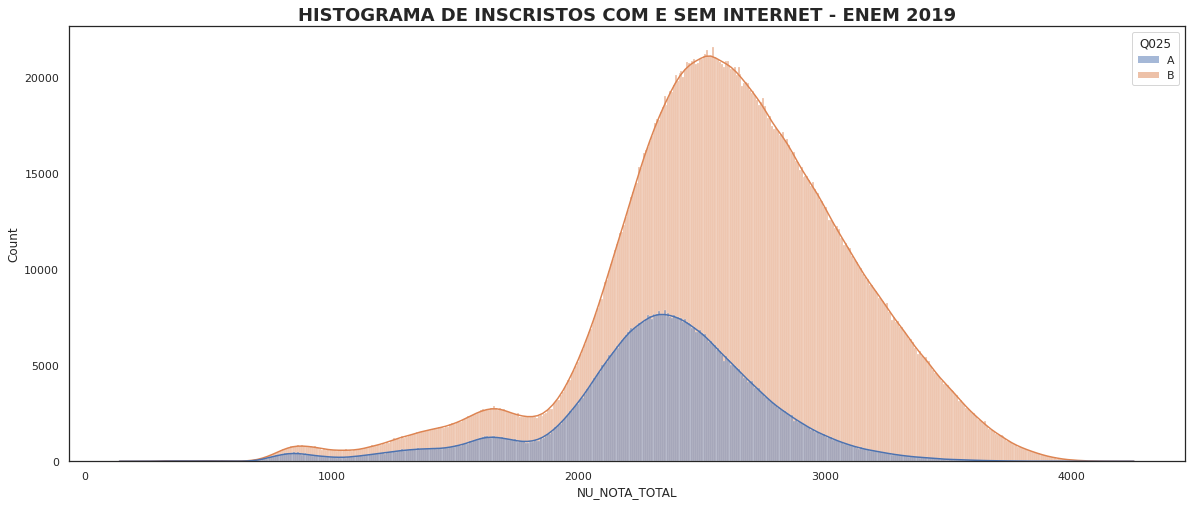

In [58]:
#HISTOGRAMA DE INSCRISTOS COM E SEM INTERNET
sns.histplot(dados, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.title("HISTOGRAMA DE INSCRISTOS COM E SEM INTERNET - ENEM 2019", weight='bold', size=18)

ACESSO A INTERNET:
A - SEM ACESSO
B - COM ACESSO


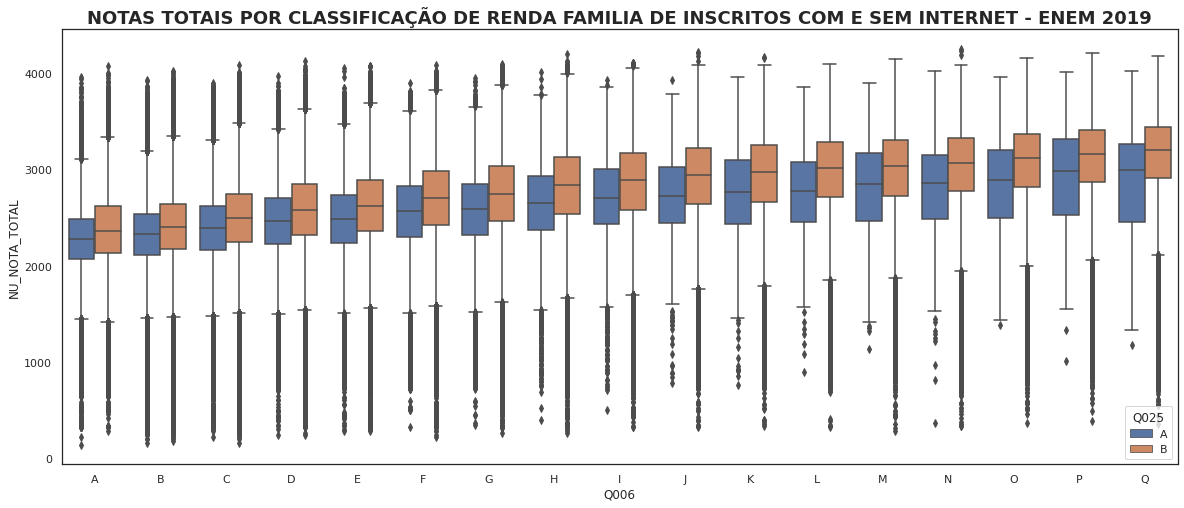

In [59]:
#NOTAS TOTAIS POR CLASSIFICAÇÃO DE RENDA FAMILIAR DE INSCRITOS COM E SEM INTERNET
plotBoxplot(x="Q006",y="NU_NOTA_TOTAL",data = dados, order=renda_ordenada, hue='Q025', title="NOTAS TOTAIS POR CLASSIFICAÇÃO DE RENDA FAMILIA DE INSCRITOS COM E SEM INTERNET - ENEM 2019")
print('''ACESSO A INTERNET:
A - SEM ACESSO
B - COM ACESSO''')

### **Conclusão**

**Qual Estado tem a maior média de notas?**

Os dados indicam que no geral as notas por Estado não tem uma diferença muito grande entre um e outro. 

**Quantos menores tem inscritos na prova?**

Os dados mostra que realmente tem um grande numero de menores inscritos no enem, a maior parte deles em idade de conclusão do ensino médio.

**Resultados por Gênero?**

Existe uma diferencia entre os resultados de meninos e meninas, os meninos apresentaram resultados superiores às notas das meninas.

**O tipo de escola que se formou tem influência na nota?**

Sim influênciou nos resultados, os incristos que concluiram o ensino médio em escolas privadas apresentaram resultados superiores a os que concluiram em escolas publicas ou não informaram o tipo de escola.

**A renda familiar realmente influência na nota?**

A renda familiar influênciou bastante na nota pois no gráfico ficou bastante visível que quanto maior a renda maior é a média de notas. O que deixa bem evidente que o inscrito que tem a maior renda tem uma qualidade de ensino bastante superior ao inscrito de baixa renda.

**Ter acesso a internet realmente ajuda?**

Sim o acesso a internet tem efeitos positivos nos resultados das notas.


## Correlação das Notas das Provas.

In [60]:
# CORRELAÇÃO DAS PROVAS
corr = dados[provas].corr()
corr.style.background_gradient(cmap='YlGnBu')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.669137,0.647697,0.642732,0.505274,0.785546
NU_NOTA_CH,0.669137,1.000000,0.610537,0.741002,0.527831,0.733103
NU_NOTA_MT,0.647697,0.610537,1.000000,0.589574,0.495566,0.789122
NU_NOTA_LC,0.642732,0.741002,0.589574,1.000000,0.537023,0.712753
NU_NOTA_REDACAO,0.505274,0.527831,0.495566,0.537023,1.000000,0.784819
NU_NOTA_TOTAL,0.785546,0.733103,0.789122,0.712753,0.784819,1.000000


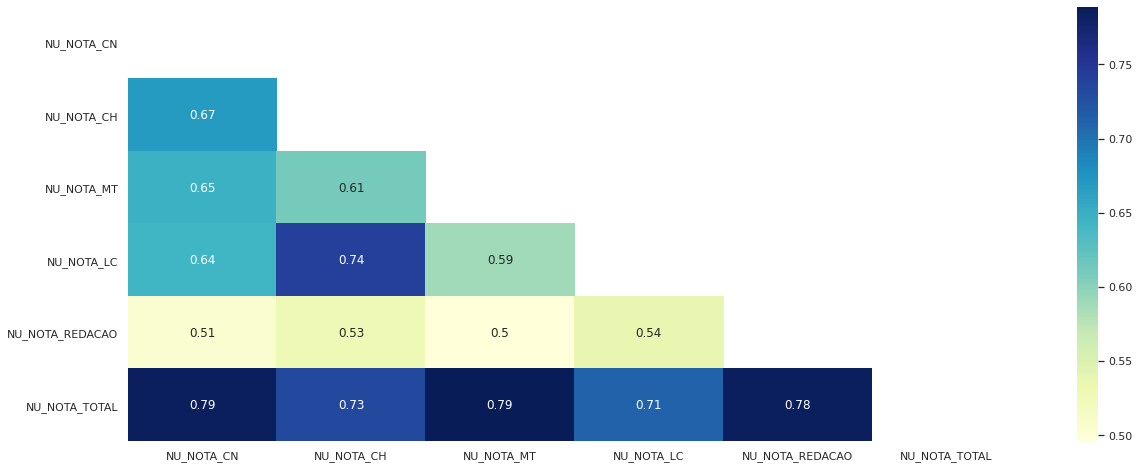

In [61]:
# CORRELAÇÃO USANDO O HEATMAP
df_provas = dados[provas]
matrix = np.triu(df_provas.corr())
sns.heatmap(df_provas.corr(), cmap='YlGnBu', annot=True, mask=matrix)

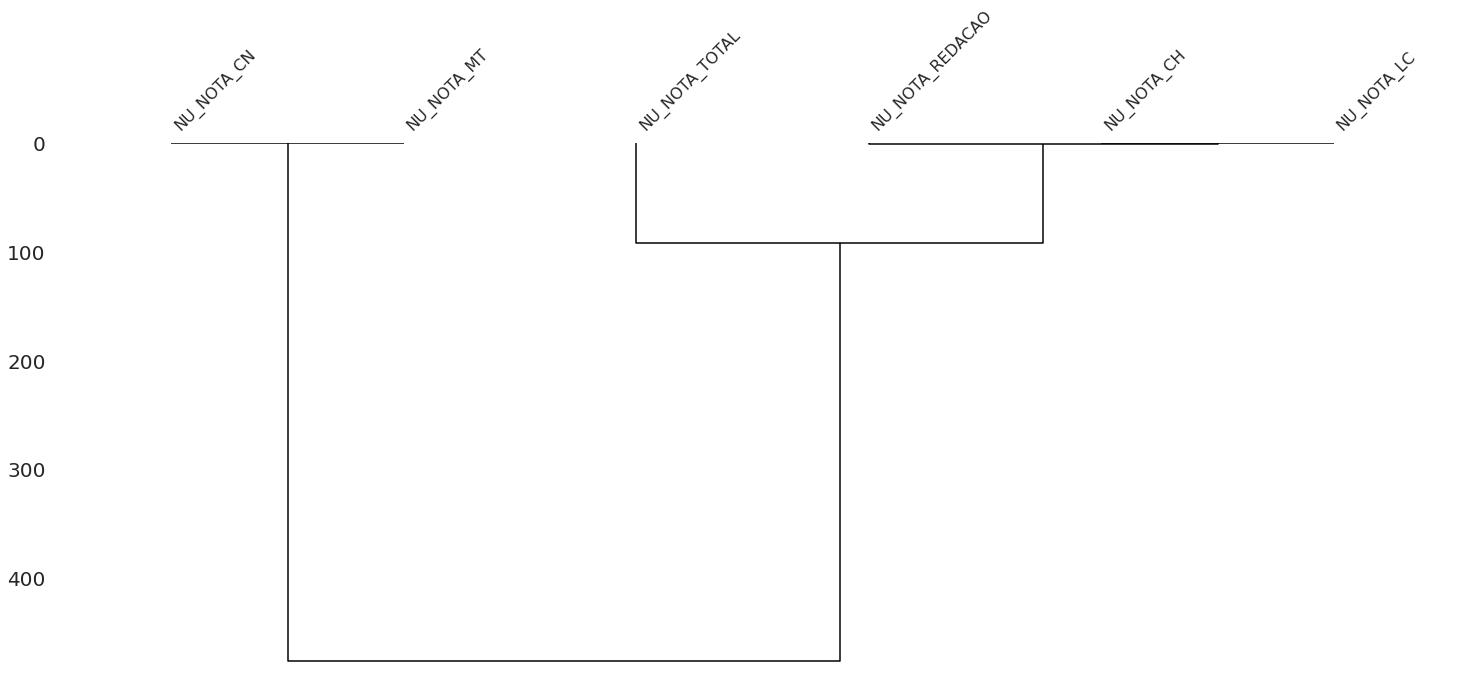

In [62]:
# DENDOGRAMA DAS PROVAS
import missingno as msno
msno.dendrogram(dados[provas])

Text(0.5, 1.0, 'CORRELAÇÃO DAS NOTAS DE CIÊNCIAS HUMANAS E LINGUAGENS E CÓDIGOS - ENEM 2019')

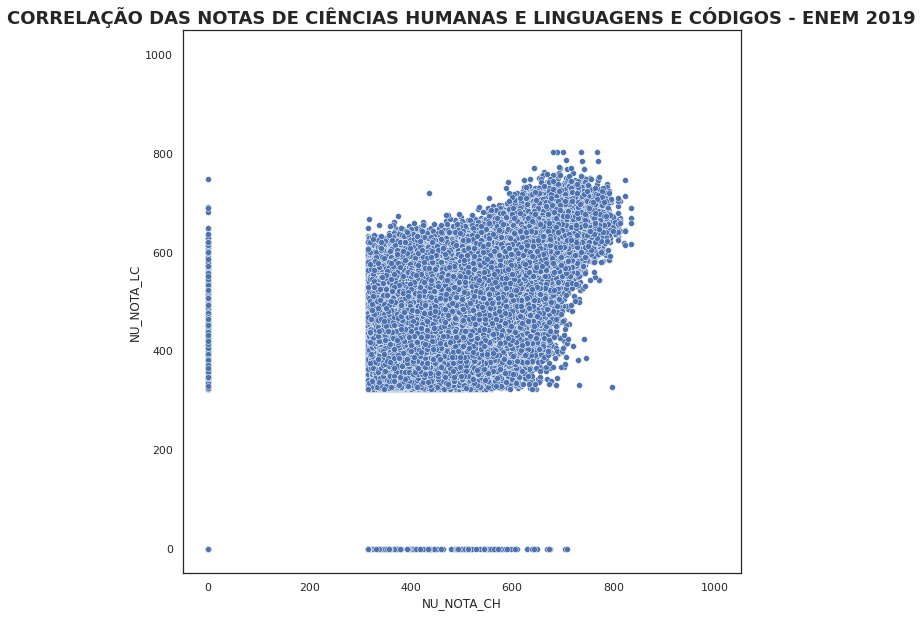

In [63]:
#CORRELAÇÃO DAS NOTAS DE MATEMÁTICA E LINGUAGENS E CÓDIGOS
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados, x='NU_NOTA_CH', y='NU_NOTA_LC')
plt.xlim(-50, 1050)
plt.ylim(-50, 1050)
plt.title("CORRELAÇÃO DAS NOTAS DE CIÊNCIAS HUMANAS E LINGUAGENS E CÓDIGOS - ENEM 2019", weight='bold', size=18)

Text(0.5, 1.0, 'CORRELAÇÃO DE TODAS AS PROVAS - ENEM 2019')

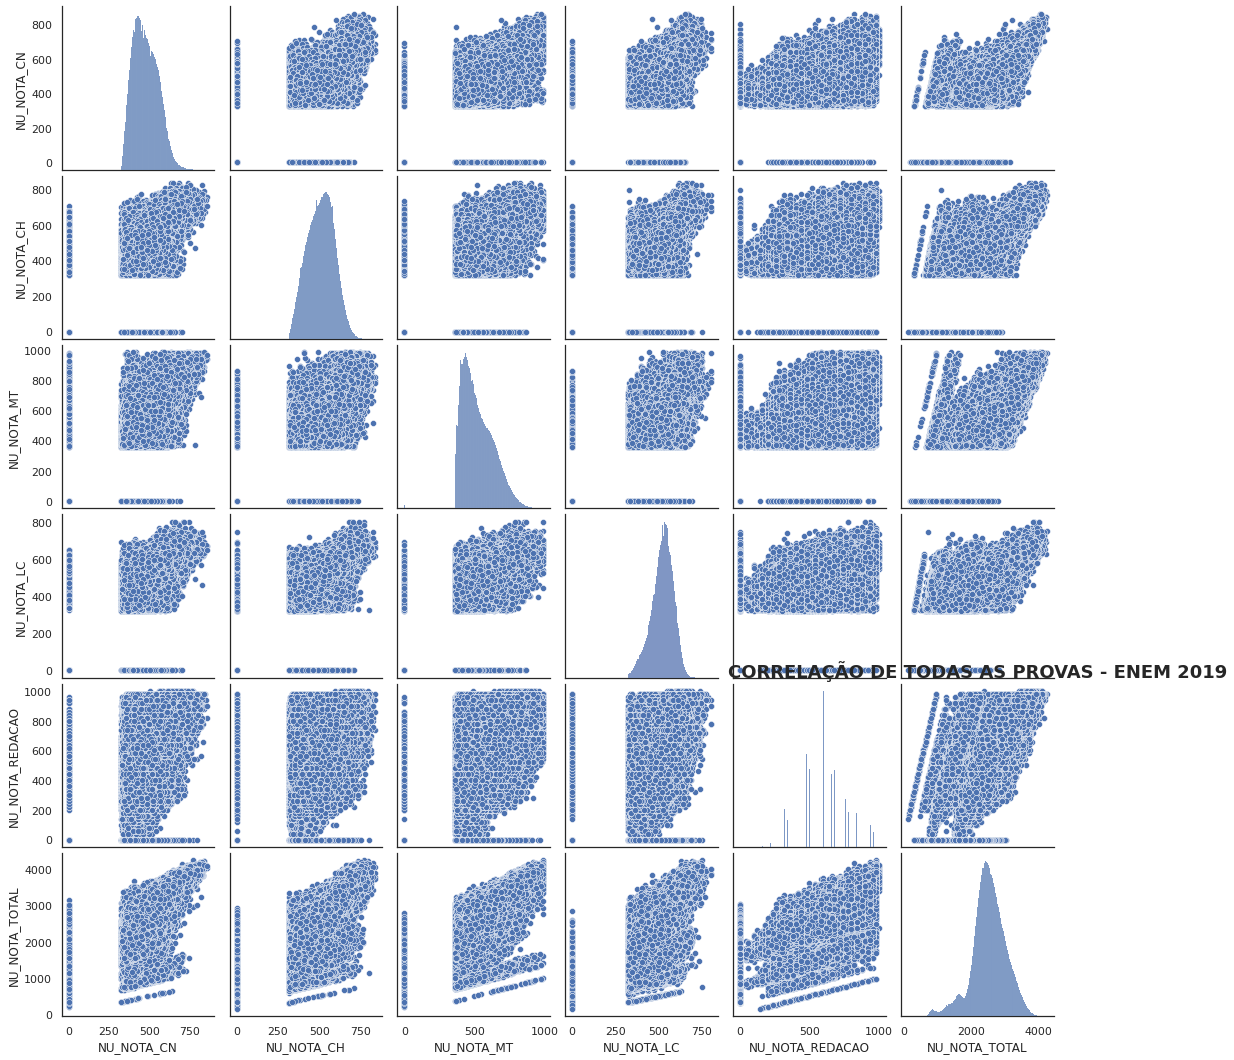

In [64]:
#CORRELAÇÃO DE TODAS AS PROVAS
sns.pairplot(dados[provas])
plt.title("CORRELAÇÃO DE TODAS AS PROVAS - ENEM 2019", weight='bold', size=18)

**Conclusão**

Analisando os gráficos de correlações fica nítitdo que não tem nenhuma prova com uma correlação extremamente forte, mas algumas como Linguagens e Códigos versus Ciências Humanas tem uma correlação interessante.